### Circulation in SVB


In [1]:
import cmocean as cmo
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from xmitgcm import open_mdsdataset
import seaborn as sns

In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [21]:
def unstagger(ugrid, vgrid):
    """ Interpolate u and v component values to values at grid cell centres (from D.Latornell for NEMO output).
    The shapes of the returned arrays are 1 less than those of
    the input arrays in the y and x dimensions.
    :arg ugrid: u velocity component values with axes (..., y, x)
    :type ugrid: :py:class:`numpy.ndarray`
    :arg vgrid: v velocity component values with axes (..., y, x)
    :type vgrid: :py:class:`numpy.ndarray`
    :returns u, v: u and v component values at grid cell centres
    :rtype: 2-tuple of :py:class:`numpy.ndarray`
    """
    u = np.add(ugrid[..., :-1], ugrid[..., 1:]) / 2
    v = np.add(vgrid[..., :-1, :], vgrid[..., 1:, :]) / 2
    return u, v

In [5]:
# Load output
outdir = '/data/SO2/sio-kramosmusalem/exp06_512x612x100_ORL_SVB/01_SVB_febTS_output/'
levels = [1,   2,  3,  4,  5,  6,  7,  8,  9, 10, 
          11, 12, 13, 14, 15, 16, 17,
          18, 19, 20, 21, 22, 23, 24, 25,
          26, 27, 28, 29, 30, 31,
          32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
          45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,              
          58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 
          74, 79, 84, 89, 94, 99,]
ds = open_mdsdataset(outdir, prefix=['eta','dynVars'], levels=levels)

In [6]:
# Load grid variables and mask
LAT = ds['YC'][:]
LON = ds['XC'][:]-360
lat = ds.YC[:,0].data
lon = ds.XC[0,:].data-360

nx = len(lon)
ny = len(lat)

# centers mask
hFacC = ds['hFacC'][:]
hfac = np.ma.masked_values(hFacC, 0)
mask = np.ma.getmask(hfac)
depth = ds['Depth'][:]

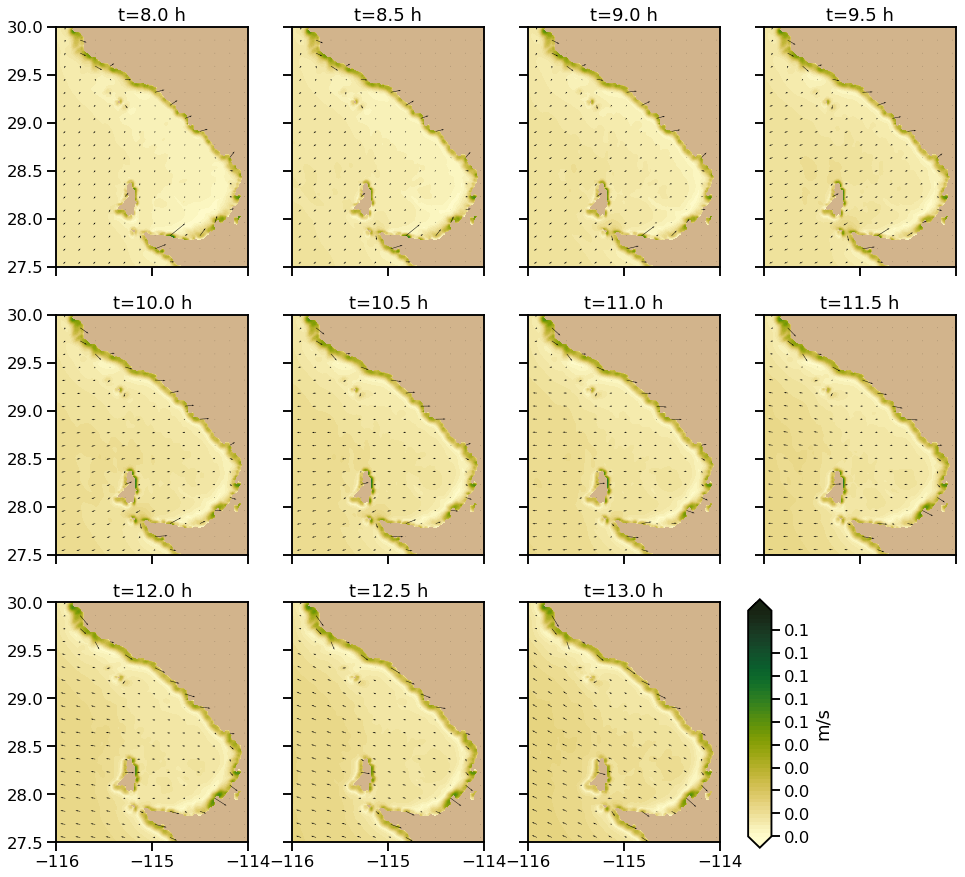

In [42]:
sns.set_context('talk')
sns.set_palette('rocket', 8)
cmap=cmo.cm.speed
time = np.arange(0,720)*600
vmin = 0
vmax = 0.1
levs = np.linspace(vmin,vmax,60)
fig, ((ax1,ax2,ax3,ax4),
      (ax5,ax6,ax7,ax8),
      (ax9,ax10,ax11,ax12))=plt.subplots(3, 4, 
                                         figsize=(16.2,15),
                                         sharey=True,sharex=True)
zz = 1
axs=[ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11]
for tt, ax in zip(range(48, 80, 3),axs):
    ax.set_xlim(-116, -114)
    ax.set_ylim(27.5, 30)
    ax.set_facecolor('tan')

    U = ds['UVEL'][tt,zz,:,:]
    V = ds['VVEL'][tt,zz,:,:]
    uu,vv = unstagger(U[:-1,:].data,V[:,:-1].data)
    spd = np.sqrt(uu**2+vv**2)
    pc = ax.contourf(lon[:-1],lat[:-1], 
                     np.ma.masked_array(spd,mask=mask[zz,:-1,:-1]),
                     levels=levs,
                     cmap=cmap, 
                     vmin=vmin, vmax=vmax,
                     extend='both')
    ax.set_title('t=%1.1f h'%(time[tt]/3600))
    ax.set_aspect(1)

    qv = ax.quiver(lon[:-1:10],lat[:-1:10],
                   uu[::10,::10],vv[::10,::10], 
                   color='k',scale=0.5)
cbar_ax = fig.add_axes([0.72, 0.12, 0.02, 0.23]) 
cb = fig.colorbar(pc,
                  cax=cbar_ax, orientation='vertical', 
                  format='%1.1f', label='m/s',
                  extend='both')

    
# Remove ax12 (this is a lazy way to do it. Use gridspec?)
ax12.xaxis.set_visible(False)
ax12.yaxis.set_visible(False)
for spine in ['top', 'right', 'left', 'bottom']:
    ax12.spines[spine].set_visible(False)